In [3]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Load data

We'll use `web.DataReader()` to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [4]:
start = datetime(2015, 6, 1)
end = datetime(2018, 6, 22)
df = web.DataReader('AAPL', 'morningstar', start, end)
df.head()

Close     High     Low    Open    Volume
Symbol Date                                                  
AAPL   2015-06-01  130.535  131.390  130.05  131.20  32112797
       2015-06-02  129.960  130.655  129.32  129.86  33667627
       2015-06-03  130.120  130.940  129.90  130.66  30983542
       2015-06-04  129.360  130.580  128.91  129.58  38450118
       2015-06-05  128.650  129.690  128.36  129.50  35626800

# Set the date to be the index

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the date column to be the index.

In [5]:
df.reset_index(inplace=True)
df.head()

,Symbol,Date,Close,High,Low,Open,Volume
0,AAPL,2015-06-01,130.535,131.390,130.05,131.20,32112797
1,AAPL,2015-06-02,129.960,130.655,129.32,129.86,33667627
2,AAPL,2015-06-03,130.120,130.940,129.90,130.66,30983542
3,AAPL,2015-06-04,129.360,130.580,128.91,129.58,38450118
4,AAPL,2015-06-05,128.650,129.690,128.36,129.50,35626800


In [6]:
df.dtypes

Symbol            object
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [7]:
# if column is string 
# df['Data']= pd.to_datetime(df['Date'])

In [9]:
len(df.Date.unique())

800

In [10]:
df.shape

(800, 7)

In [11]:
df.set_index('Date', inplace=True)
df.head()

,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2015-06-01,AAPL,130.535,131.390,130.05,131.20,32112797
2015-06-02,AAPL,129.960,130.655,129.32,129.86,33667627
2015-06-03,AAPL,130.120,130.940,129.90,130.66,30983542
2015-06-04,AAPL,129.360,130.580,128.91,129.58,38450118
2015-06-05,AAPL,128.650,129.690,128.36,129.50,35626800


In [12]:
df.tail()

,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2018-06-18,AAPL,188.74,189.22,187.20,187.88,18484865
2018-06-19,AAPL,185.69,186.33,183.45,185.14,33578455
2018-06-20,AAPL,186.50,187.20,185.73,186.35,20628701
2018-06-21,AAPL,185.46,188.35,184.94,187.25,25711898
2018-06-22,AAPL,184.92,186.15,184.70,186.12,27200447


In [13]:
df.drop('Symbol', axis=1, inplace=True)

# Explore the data

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

# Filtering by dates

Now that our Date column is the index, we can filter our data in unique ways. Try `df['2016']` in the cell below:

In [15]:
df['2016'].head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-01,105.26,105.260,105.26,105.26,0
2016-01-04,105.35,105.368,102.00,102.61,67649387
2016-01-05,102.71,105.850,102.41,105.75,55790992
2016-01-06,100.70,102.370,99.87,100.56,68457388
2016-01-07,96.45,100.130,96.43,98.68,81094428


You can also filter by month:

In [16]:
df['2016-06'].head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-06-01,98.46,99.54,98.33,99.02,29173285
2016-06-02,97.72,97.84,96.63,97.60,40191600
2016-06-03,97.92,98.27,97.45,97.79,28504888
2016-06-06,98.63,101.89,97.55,97.99,23292504
2016-06-07,99.03,99.87,98.96,99.25,22409450


# Resampling

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [17]:
df.resample('A').mean()
# A is angle

,Close,High,Low,Open,Volume
Date,,,,,
2015-12-31,117.507045,118.686145,116.352916,117.612143,4.894606e+07
2016-12-31,104.574636,105.369310,103.692350,104.481648,3.711183e+07
2017-12-31,150.427212,151.252567,149.400524,150.331663,2.619797e+07
2018-12-31,176.534320,178.051964,175.068617,176.491332,3.192704e+07


In [19]:
df.resample('W').mean()
# Here shift + tab and see

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-07,129.725,130.65100,129.30800,130.16000,34168176.8
2015-06-14,127.972,129.02800,127.17700,128.17700,44022917.8
2015-06-21,127.260,127.82000,126.48800,127.15800,39705050.8
2015-06-28,127.400,128.53200,127.01784,127.74200,39118800.8
2015-07-05,125.887,126.53200,125.50800,126.16000,30196374.4
2015-07-12,123.522,124.98600,122.31800,124.22000,55143673.6
2015-07-19,127.244,127.49300,126.12000,126.72200,37849006.8
2015-07-26,127.540,128.84400,126.39400,127.46600,68853804.2
2015-08-02,122.562,123.24648,121.91200,122.90800,38319702.2


# Lookup challenge

Where can you find all the resample options?

In [ ]:
df.

# "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

In [20]:
df.rolling(2).mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,130.2475,131.0225,129.6850,130.5300,32890212.0
2015-06-03,130.0400,130.7975,129.6100,130.2600,32325584.5
2015-06-04,129.7400,130.7600,129.4050,130.1200,34716830.0
2015-06-05,129.0050,130.1350,128.6350,129.5400,37038459.0
2015-06-08,128.2250,129.4500,127.5950,129.2000,44150793.0
2015-06-09,127.6100,128.6450,126.2250,127.8000,54375103.0
2015-06-10,128.1500,128.7100,126.7350,127.3100,47581335.0
2015-06-11,128.7350,129.7600,128.1625,128.5500,37239068.5


In [21]:
df.rolling(3).mean().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,NaN,NaN,NaN,NaN,NaN
2015-06-03,130.205000,130.995000,129.756667,130.573333,3.225466e+07
2015-06-04,129.813333,130.725000,129.376667,130.033333,3.436710e+07
2015-06-05,129.376667,130.403333,129.056667,129.913333,3.502015e+07


# Challenge

Concatenate the `Close` column with the 3 day rolling mean of the `Close` column.

In [24]:
pd.concat([df[['Close']], df[['Close']].rolling(3).mean()], axis=1).head()

,Close,Close
Date,,
2015-06-01,130.535,NaN
2015-06-02,129.960,NaN
2015-06-03,130.120,130.205000
2015-06-04,129.360,129.813333
2015-06-05,128.650,129.376667


# Challenge

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

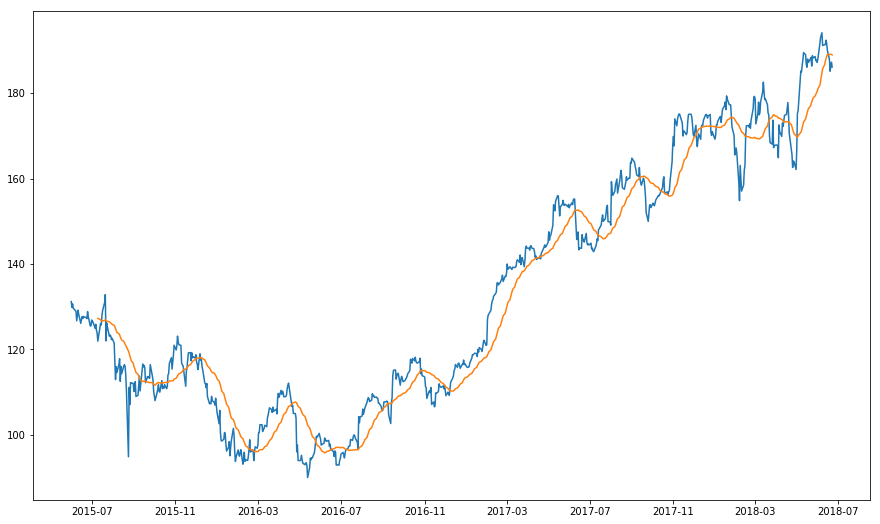

In [25]:
plt.figure(figsize=(15,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())

# The Expanding Mean
---

The "expanding mean" simply uses all data points up to the current time to calculate the mean, as opposed to a moving window.

In [26]:
df.expanding().mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535000,131.390000,130.050000,131.200000,3.211280e+07
2015-06-02,130.247500,131.022500,129.685000,130.530000,3.289021e+07
2015-06-03,130.205000,130.995000,129.756667,130.573333,3.225466e+07
2015-06-04,129.993750,130.891250,129.545000,130.325000,3.380352e+07
2015-06-05,129.725000,130.651000,129.308000,130.160000,3.416818e+07
2015-06-08,129.404167,130.410833,128.895000,129.950000,3.725261e+07
2015-06-09,129.120714,130.077857,128.427143,129.485714,3.994158e+07
2015-06-10,129.090625,129.985625,128.355000,129.290000,3.983479e+07
2015-06-11,129.035000,130.007222,128.368333,129.277778,3.934103e+07


# Exponentially Weighted Windows
---

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time, $t$, is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows) for more information.

In [27]:
df.ewm(span=10).mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535000,131.390000,130.050000,131.200000,3.211280e+07
2015-06-02,130.218750,130.985750,129.648500,130.463000,3.296795e+07
2015-06-03,130.179053,130.967359,129.749601,130.542193,3.217023e+07
2015-06-04,129.909212,130.839741,129.472990,130.225193,3.423918e+07
2015-06-05,129.547726,130.509682,129.153481,130.017010,3.463752e+07
2015-06-08,129.093781,130.172110,128.549993,129.726884,3.932242e+07
2015-06-09,128.690467,129.667995,127.843982,128.997526,4.335922e+07
2015-06-10,128.733587,129.593375,127.845351,128.752384,4.238733e+07
2015-06-11,128.702347,129.721004,127.982341,128.845418,4.086515e+07


# Using `.diff()` to calculate changes in values from day to day

In [28]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


In [30]:
df.diff().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,-0.575,-0.735,-0.73,-1.34,1554830.0
2015-06-03,0.160,0.285,0.58,0.80,-2684085.0
2015-06-04,-0.760,-0.360,-0.99,-1.08,7466576.0
2015-06-05,-0.710,-0.890,-0.55,-0.08,-2823318.0


# Using `df.pct_change()` to calculate percent changes from day to day

In [31]:
df.pct_change().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,-0.004405,-0.005594,-0.005613,-0.010213,0.048418
2015-06-03,0.001231,0.002181,0.004485,0.006160,-0.079723
2015-06-04,-0.005841,-0.002749,-0.007621,-0.008266,0.240985
2015-06-05,-0.005489,-0.006816,-0.004267,-0.000617,-0.073428


# Challenge

Create three **separate** plots:
1. One for the Close price
2. One for the Close price, using `.diff()`
3. One for the Close price as a percent change.

What happens to your overall data when you diff? Is this good or bad?

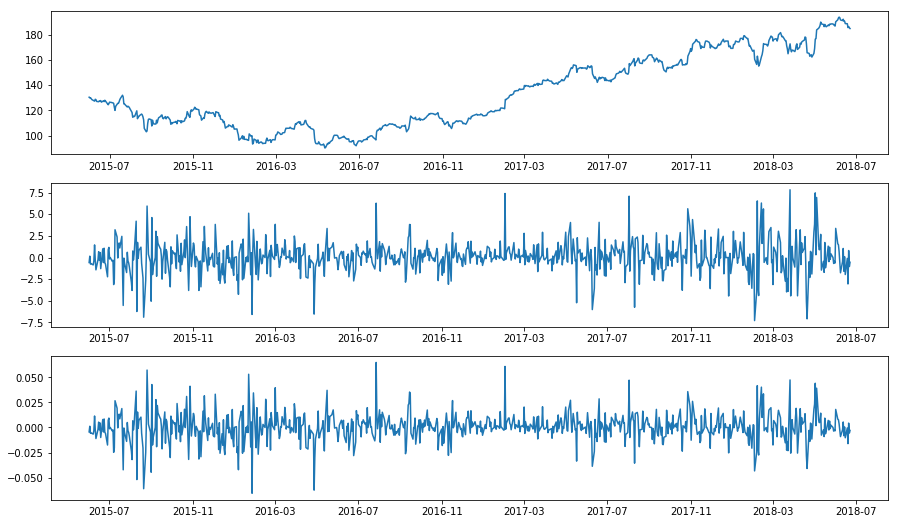

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 9))
axes[0].plot(df['Close'])
axes[1].plot(df['Close'].diff())
axes[2].plot(df['Close'].pct_change())

# Shifting

`df.shift()` is used to bring values from previous dates forward in time.

In [34]:
df.shift().head()

# super handy historical data being used. df.shift(2) move 2 days into future. 

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,130.535,131.390,130.05,131.20,32112797.0
2015-06-03,129.960,130.655,129.32,129.86,33667627.0
2015-06-04,130.120,130.940,129.90,130.66,30983542.0
2015-06-05,129.360,130.580,128.91,129.58,38450118.0


# Creating a simple dataset

Let's create a simple dataset that tries to predict today's Close price using yesterday's Close price with today's Open. 

In [36]:
close_1 = df[['Close']].shift().rename(columns={'Close': 'Close - 1'})
train = pd.concat([close_1, df[['Open', 'Close']]], axis=1)

In [39]:
train.dropna(inplace=True)
train.head()

,Close - 1,Open,Close
Date,,,
2015-06-02,130.535,129.86,129.96
2015-06-03,129.960,130.66,130.12
2015-06-04,130.120,129.58,129.36
2015-06-05,129.360,129.50,128.65
2015-06-08,128.650,128.90,127.80


Use `cross_val_score` to see how a `RandomForestRegressor`

In [41]:
X = train[['Close - 1', 'Open']]
y = train['Close']

In [42]:
rf = RandomForestRegressor()

In [44]:
cross_val_score(rf, X, y, cv=5)

array([ 0.92901393,  0.82727758,  0.97134306,  0.82601909,  0.35903154])

Let's evaluate what is going on. Use cross_val_predict to create a `Pred` column on `train`.

In [45]:
train['Pred']=cross_val_predict(rf,X,y)
train.head()

,Close - 1,Open,Close,Pred
Date,,,,
2015-06-02,130.535,129.86,129.96,131.276
2015-06-03,129.960,130.66,130.12,130.979
2015-06-04,130.120,129.58,129.36,130.241
2015-06-05,129.360,129.50,128.65,130.117
2015-06-08,128.650,128.90,127.80,129.333


In [46]:
train.tail()

,Close - 1,Open,Close,Pred
Date,,,,
2018-06-18,188.84,187.88,188.74,155.537
2018-06-19,188.74,185.14,185.69,155.537
2018-06-20,185.69,186.35,186.50,155.537
2018-06-21,186.50,187.25,185.46,155.537
2018-06-22,185.46,186.12,184.92,155.537


In [47]:
df['Day Percent Change'] = (df['Close'] - df['Open']) / df['Open']
df.head()

,Close,High,Low,Open,Volume,Day Percent Change
Date,,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797,-0.005069
2015-06-02,129.960,130.655,129.32,129.86,33667627,0.000770
2015-06-03,130.120,130.940,129.90,130.66,30983542,-0.004133
2015-06-04,129.360,130.580,128.91,129.58,38450118,-0.001698
2015-06-05,128.650,129.690,128.36,129.50,35626800,-0.006564


In [49]:
(df['Day Percent Change']>0).astype(int)
# it turns it classification problem

Date
2015-06-01    0
2015-06-02    1
2015-06-03    0
2015-06-04    0
2015-06-05    0
2015-06-08    0
2015-06-09    1
2015-06-10    1
2015-06-11    0
2015-06-12    0
2015-06-15    1
2015-06-16    1
2015-06-17    0
2015-06-18    1
2015-06-19    0
2015-06-22    1
2015-06-23    0
2015-06-24    1
2015-06-25    0
2015-06-26    0
2015-06-29    0
2015-06-30    0
2015-07-01    0
2015-07-02    1
2015-07-03    0
2015-07-06    1
2015-07-07    0
2015-07-08    0
2015-07-09    0
2015-07-10    1
             ..
2018-05-14    0
2018-05-15    0
2018-05-16    1
2018-05-17    0
2018-05-18    0
2018-05-21    0
2018-05-22    0
2018-05-23    1
2018-05-24    0
2018-05-25    1
2018-05-28    0
2018-05-29    1
2018-05-30    0
2018-05-31    0
2018-06-01    1
2018-06-04    1
2018-06-05    1
2018-06-06    1
2018-06-07    0
2018-06-08    1
2018-06-11    0
2018-06-12    1
2018-06-13    0
2018-06-14    0
2018-06-15    0
2018-06-18    1
2018-06-19    1
2018-06-20    1
2018-06-21    0
2018-06-22    0
Name: Day Percent C

In [1]:
#----

SyntaxError: invalid syntax (<ipython-input-2-d93c8dd246e3>, line 1)